In [1]:
%load_ext nb_black
import numpy as np
from matplotlib import pyplot as plt
import backend
import functools
import os

<IPython.core.display.Javascript object>

# Prepare generic run

In [2]:
f = functools.partial(backend.rosenbrock_function)
df = functools.partial(backend.rosenbrock_function, deriv=1)

x_0 = np.array([0.5, 2]).reshape((2, 1))
x_opt = np.array([1, 1]).reshape((2, 1))
N = 20
max_k = 30
lims = [-3, 3]
error_norms = {}
learning_rates = np.logspace(-2, -5, 10)
optimizers = {
    "vanilla_sgd" : backend.gradient_descent,
    "adam_biased" : backend.adam_gradient_descent
}

<IPython.core.display.Javascript object>

In [3]:
from supermariopy import plotting

<IPython.core.display.Javascript object>

In [20]:
for optimizer_name, optimizer_callable in optimizers.items():
    x_terminal_list = []
    for learning_rate in learning_rates:
        with plt.rc_context(plotting.NB_RC_PARAMS):
            fig, ax, x_terminal = optimizer_callable(f, df, x_0, N, max_k, lims, learning_rate)
            x_terminal_list.append(x_terminal)
            title = f"learning_rate_{learning_rate:05f}"
            ax.set_title(title)
            ax.scatter(1, 1, color="red", marker="o", label=r"$x^{\ast}$")
            ax.legend(frameon=True)
        plt.savefig(os.path.join("output", optimizer_name + "_" + title.replace(".", "_") + ".png"))
        plt.close()
    x_terminal_list = np.concatenate(x_terminal_list, axis=1)
    error_norm = np.linalg.norm(x_opt - x_terminal_list, axis=0)
    error_norms[optimizer_name] = error_norm

<IPython.core.display.Javascript object>

# Plot Convergence rate

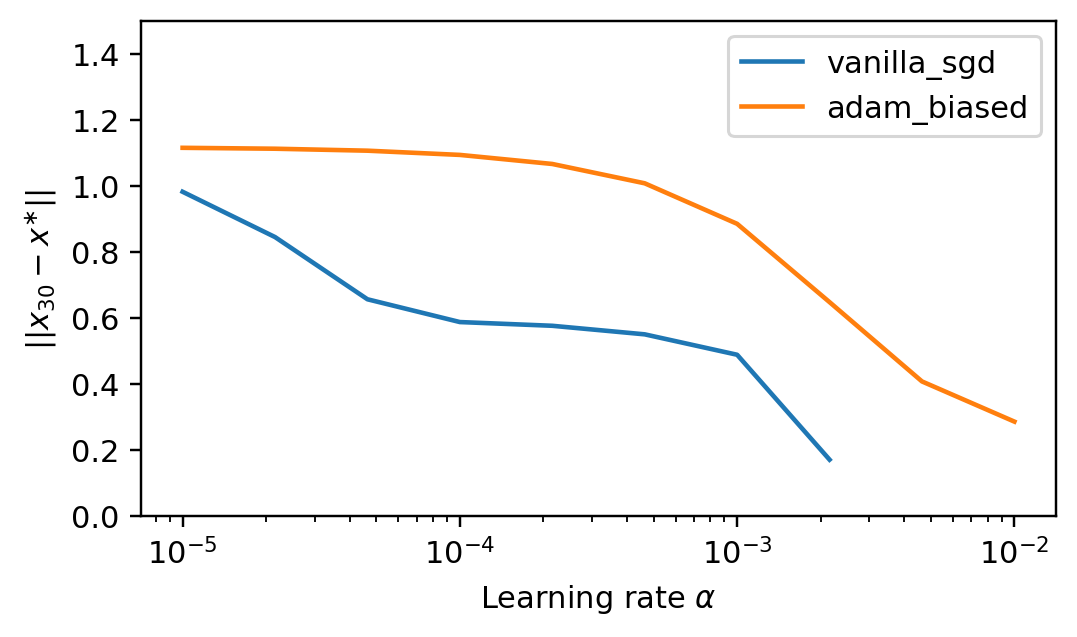

<IPython.core.display.Javascript object>

In [21]:
with plt.rc_context(plotting.NB_RC_PARAMS):
    for optimizer_name in error_norms.keys():
        plt.plot(learning_rates, error_norms[optimizer_name], label=optimizer_name)
    plt.ylabel(r"$||x_{30} - x^{\ast}||$")
    plt.xlabel(r"Learning rate $\alpha$")
    plt.xscale("log")
    plt.ylim([0, 1.5])
    plt.legend(frameon=True)
    plt.savefig(os.path.join("output", "error_norms.png"))

In [22]:
import subprocess
for optimizer_name in optimizers.keys():
    subprocess.call(["convert", "-delay", "50", "-loop", "0", f"output/{optimizer_name}*.png", f"output/{optimizer_name}.gif"])

#convert -delay 100 -loop 0 *.jpeg animatedGIF.gif

<IPython.core.display.Javascript object>

# Show final gifs

In [23]:
from IPython.display import display, HTML

HTML('''<div style="display: flex; justify-content: row;">
    <img src="output/adam_biased.gif" width=500, height=500>
    <img src="output/vanilla_sgd.gif" width=500, height=500>
</div>''')

<IPython.core.display.Javascript object>